### 1.Setup

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import initializers
#tf.logging.set_verbosity(tf.logging.ERROR) 

print("tf version: {}".format(tf.__version__))
tf.set_random_seed(1)
np.random.seed(1)

/home/fangjil/anaconda3/envs/jubo_1/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/fangjil/anaconda3/envs/jubo_1/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/fangjil/anaconda3/envs/jubo_1/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/fangjil/anaconda3/envs/jubo_1/lib/pyt

tf version: 1.14.0


### 2. Get the data

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets('data/MNIST/', one_hot=True)
data.test.cls = np.argmax(data.test.labels, axis=1) 

img_size = 28
img_size_flat = img_size * img_size
img_shape = (img_size, img_size)
num_channels = 1
num_classes = 10

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/MNIST/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


### 3. Build the neural network 

#### 3.1 setup the neural network

In [3]:
input_x = tf.placeholder(tf.float32, [None, img_size_flat]) 
y_true = tf.placeholder(tf.float32, [None, num_classes])
y_true_cls = tf.argmax(y_true, dimension=1)

with tf.variable_scope("DNN_1_model"):
    h1_a = tf.layers.dense(inputs=input_x, units=100, activation=tf.nn.relu, name='h1_a', kernel_initializer=initializers.RandomNormal(stddev=0.01))
    h2_a = tf.layers.dense(inputs=h1_a, units=200, activation=tf.nn.relu, name='h2_a', kernel_initializer=initializers.RandomNormal(stddev=0.01))
    h3_a = tf.layers.dense(inputs=h2_a, units=200, activation=tf.nn.relu, name='h3_a', kernel_initializer=initializers.RandomNormal(stddev=0.01)) 
    h4_a = tf.layers.dense(inputs=h3_a, units=200, activation=tf.nn.relu, name='h4_a', kernel_initializer=initializers.RandomNormal(stddev=0.01))
    h5_a = tf.layers.dense(inputs=h4_a, units=200, activation=tf.nn.relu, name='h5_a', kernel_initializer=initializers.RandomNormal(stddev=0.01)) 
    h6_a = tf.layers.dense(inputs=h5_a, units=200, activation=tf.nn.relu, name='h6_a', kernel_initializer=initializers.RandomNormal(stddev=0.01)) 
    h7_a = tf.layers.dense(inputs=h6_a, units=100, activation=tf.nn.relu, name='h7_a', kernel_initializer=initializers.RandomNormal(stddev=0.01)) 
    logits_a = tf.layers.dense(inputs=h7_a, units= num_classes, name='output_a')
    y_pred_a = tf.nn.softmax(logits=logits_a)
    y_pred_cls_a = tf.argmax(y_pred_a, dimension=1)

    
with tf.variable_scope("DNN_2_model"):
    h1_b = tf.layers.dense(inputs=input_x, units=353, activation=tf.nn.relu, name='h1_b')
    logits_b = tf.layers.dense(inputs=h1_b, units= num_classes, name='output_b')
    y_pred_b = tf.nn.softmax(logits=logits_b)
    y_pred_cls_b = tf.argmax(y_pred_b, dimension=1)
    
    
trainable_variable_a = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, "DNN_1_model")
trainable_variable_b = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, "DNN_2_model")

cross_entropy_a = tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=logits_a)
cross_entropy_b = tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=logits_b)
loss_a = tf.reduce_mean(cross_entropy_a)
loss_b = tf.reduce_mean(cross_entropy_b)
optimizer_a = tf.train.AdamOptimizer(learning_rate=1e-4)
optimizer_b = tf.train.AdamOptimizer(learning_rate=1e-4)
train_op_a = optimizer_a.minimize(loss_a, var_list= trainable_variable_a)
train_op_b = optimizer_b.minimize(loss_b, var_list= trainable_variable_b)

correct_prediction_a = tf.equal(y_pred_cls_a, y_true_cls)
correct_prediction_b = tf.equal(y_pred_cls_b, y_true_cls)
accuracy_a = tf.reduce_mean(tf.cast(correct_prediction_a, tf.float32))
accuracy_b = tf.reduce_mean(tf.cast(correct_prediction_b, tf.float32))



grads = tf.gradients(loss_a, input_x)[0]


Instructions for updating:
Use the `axis` argument instead
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



#### 3.2 play with the parameters

In [4]:
def get_weights_variable(layer_name):
    
    with tf.variable_scope(layer_name, reuse=True):
        variable = tf.get_variable('kernel')

    return variable

weights_whole = []

weights_h1a = get_weights_variable(layer_name='DNN_1_model/h1_a')
weights_whole.append(weights_h1a)
weights_h2a = get_weights_variable(layer_name='DNN_1_model/h2_a')
weights_whole.append(weights_h2a)
weights_h3a = get_weights_variable(layer_name='DNN_1_model/h3_a')
weights_whole.append(weights_h3a)
weights_h4a = get_weights_variable(layer_name='DNN_1_model/h4_a')
weights_whole.append(weights_h4a)
weights_h5a = get_weights_variable(layer_name='DNN_1_model/h5_a')
weights_whole.append(weights_h5a)
weights_h6a = get_weights_variable(layer_name='DNN_1_model/h6_a')
weights_whole.append(weights_h6a)
weights_h7a = get_weights_variable(layer_name='DNN_1_model/h7_a')
weights_whole.append(weights_h7a)
weights_output = get_weights_variable(layer_name='DNN_1_model/output_a')
weights_whole.append(weights_output)

print(weights_h2a)

print(trainable_variable_a)



print(weights_whole)




<tf.Variable 'DNN_1_model/h2_a/kernel:0' shape=(100, 200) dtype=float32_ref>
[<tf.Variable 'DNN_1_model/h1_a/kernel:0' shape=(784, 100) dtype=float32_ref>, <tf.Variable 'DNN_1_model/h1_a/bias:0' shape=(100,) dtype=float32_ref>, <tf.Variable 'DNN_1_model/h2_a/kernel:0' shape=(100, 200) dtype=float32_ref>, <tf.Variable 'DNN_1_model/h2_a/bias:0' shape=(200,) dtype=float32_ref>, <tf.Variable 'DNN_1_model/h3_a/kernel:0' shape=(200, 200) dtype=float32_ref>, <tf.Variable 'DNN_1_model/h3_a/bias:0' shape=(200,) dtype=float32_ref>, <tf.Variable 'DNN_1_model/h4_a/kernel:0' shape=(200, 200) dtype=float32_ref>, <tf.Variable 'DNN_1_model/h4_a/bias:0' shape=(200,) dtype=float32_ref>, <tf.Variable 'DNN_1_model/h5_a/kernel:0' shape=(200, 200) dtype=float32_ref>, <tf.Variable 'DNN_1_model/h5_a/bias:0' shape=(200,) dtype=float32_ref>, <tf.Variable 'DNN_1_model/h6_a/kernel:0' shape=(200, 200) dtype=float32_ref>, <tf.Variable 'DNN_1_model/h6_a/bias:0' shape=(200,) dtype=float32_ref>, <tf.Variable 'DNN_1_mo

In [5]:
def get_total_para_num(tf_variables):
    total_parameters = 0
    for variable in tf_variables:
        shape = variable.get_shape()
        variable_parameters = 1
        for dim in shape:
            variable_parameters *= dim.value
        total_parameters += variable_parameters
    return total_parameters

print(get_total_para_num(trainable_variable_a))
print(get_total_para_num(trainable_variable_b))
print(get_total_para_num(weights_whole))

280610
280645
279400


In [6]:
def flatten_vector(vector):
    vector_flatten = []
    for i in range(len(vector)):
        x = np.array(vector[i]).flatten()
        vector_flatten.extend(x)
    return np.array(vector_flatten)

#### 3.3 train the network

In [7]:

total_record_weights_h2a = []
total_record_weights_whole = []
total_record_accuracy = []

for i in range(8):
    print(i)
    
    train_batch_size = 512

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer()) 

        list_loss_a = []
        list_loss_b = []
        list_acc_a = []
        list_acc_b = []
    
        list_acc_a_t = []
        list_acc_b_t = []
        list_iter = []
    
        record_weights_h2a = []
        record_weights_whole = []
        record_accuracy = []
    
    
        for iteration in range(int(55000/train_batch_size)*21+1):
            
                
            x_batch, y_true_batch = data.train.next_batch(train_batch_size, shuffle=True)
            feed_dict_train = {input_x: x_batch, y_true: y_true_batch}
            sess.run(train_op_a, feed_dict = feed_dict_train)
            if iteration % int(55000/train_batch_size)*3 == 0:
                feed_dict_test = {input_x: data.test.images, y_true: data.test.labels}
                a_a_t = sess.run(accuracy_a, feed_dict = feed_dict_test)
            
                
                x1 = np.array(sess.run(weights_h2a)).flatten()
                x_whole = flatten_vector(sess.run(weights_whole))
 
                #print(np.shape(x_whole))
                record_accuracy.append(a_a_t)
                record_weights_h2a.append(x1)
                record_weights_whole.append(x_whole)
                

        #sess.run(train_op_a, feed_dict = feed_dict_train)
        
            
                
                
    total_record_weights_h2a.extend(record_weights_h2a)
    total_record_weights_whole.extend(record_weights_whole)
    total_record_accuracy.extend(record_accuracy)
        

0
1
2
3
4
5
6
7


In [15]:
print(np.shape(total_record_weights_whole))

(176, 279400)


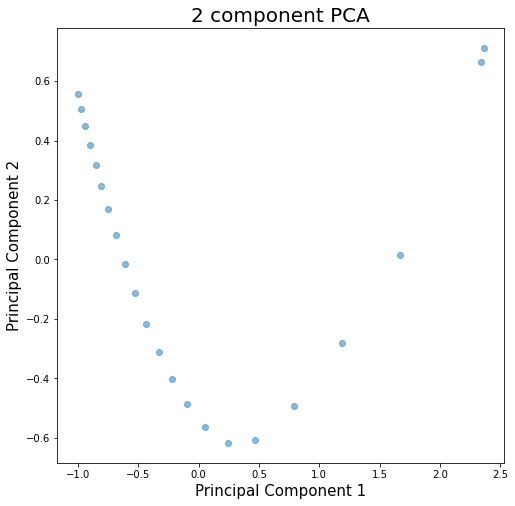

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)




principalComponents_1 = pca.fit_transform(record_weights_h2a)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(principalComponents_1[:,0], principalComponents_1[:,1], alpha=0.5)


plt.show()

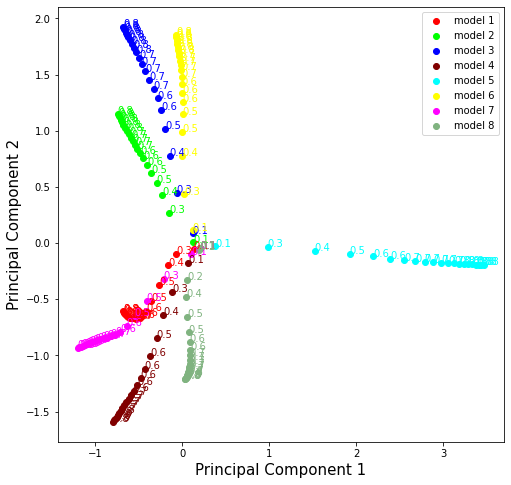

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
#ax.set_title('2 component PCA', fontsize = 20)

principalComponents_1 = pca.fit_transform(total_record_weights_h2a)

colors = [[1,0,0], [0,1,0], [0,0,1], [0.5,0,0], [0,1,1], [1,1,0], [1,0,1], [0.5,0.7,0.5]]
for i in range(8):
    index =0
    x=principalComponents_1[22*i:22*(i+1),0]
    y=principalComponents_1[22*i:22*(i+1),1]
    ax.scatter(x, y, alpha=1, label="model {}".format(i+1),color = colors[i])
    
    
    for j, txt in enumerate(np.round(total_record_accuracy[22*i:22*(i+1)],1)):
        ax.annotate(txt, (x[j], y[j]), color = colors[i])
ax.legend()
plt.show()

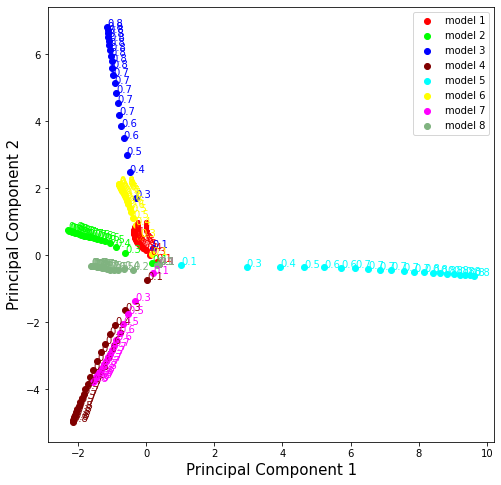

In [16]:
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
pca = PCA(n_components=2)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
#ax.set_title('2 component PCA', fontsize = 20)

principalComponents_1 = pca.fit_transform(total_record_weights_whole)

colors = [[1,0,0], [0,1,0], [0,0,1], [0.5,0,0], [0,1,1], [1,1,0], [1,0,1], [0.5,0.7,0.5]]
for i in range(8):
    index =0
    x=principalComponents_1[22*i:22*(i+1),0]
    y=principalComponents_1[22*i:22*(i+1),1]
    ax.scatter(x, y, alpha=1, label="model {}".format(i+1),color = colors[i])
    
    
    for j, txt in enumerate(np.round(total_record_accuracy[22*i:22*(i+1)],1)):
        ax.annotate(txt, (x[j], y[j]), color = colors[i])
ax.legend()
plt.show()